Wash time: 70.53658536585365 minutes


C:\Users\HP\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


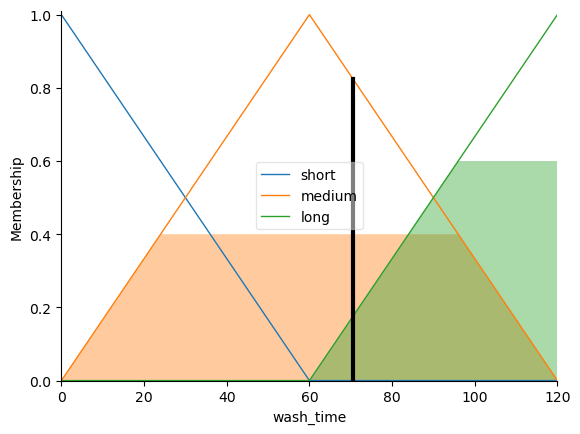

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define input variables
dirtiness = ctrl.Antecedent(np.arange(0, 11, 1), 'dirtiness')
load_size = ctrl.Antecedent(np.arange(0, 11, 1), 'load_size')

# Define output variables
wash_time = ctrl.Consequent(np.arange(0, 121, 1), 'wash_time')

# Define membership functions for input variables
dirtiness['low'] = fuzz.trimf(dirtiness.universe, [0, 0, 5])
dirtiness['medium'] = fuzz.trimf(dirtiness.universe, [0, 5, 10])
dirtiness['high'] = fuzz.trimf(dirtiness.universe, [5, 10, 10])

load_size['small'] = fuzz.trimf(load_size.universe, [0, 0, 5])
load_size['medium'] = fuzz.trimf(load_size.universe, [0, 5, 10])
load_size['large'] = fuzz.trimf(load_size.universe, [5, 10, 10])

# Define membership functions for output variable
wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 0, 60])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [0, 60, 120])
wash_time['long'] = fuzz.trimf(wash_time.universe, [60, 120, 120])

# Define fuzzy rules
rule1 = ctrl.Rule(dirtiness['low'] & load_size['small'], wash_time['short'])
rule2 = ctrl.Rule(dirtiness['low'] & load_size['medium'], wash_time['medium'])
rule3 = ctrl.Rule(dirtiness['low'] & load_size['large'], wash_time['long'])
rule4 = ctrl.Rule(dirtiness['medium'] & load_size['small'], wash_time['medium'])
rule5 = ctrl.Rule(dirtiness['medium'] & load_size['medium'], wash_time['medium'])
rule6 = ctrl.Rule(dirtiness['medium'] & load_size['large'], wash_time['long'])
rule7 = ctrl.Rule(dirtiness['high'] & load_size['small'], wash_time['long'])
rule8 = ctrl.Rule(dirtiness['high'] & load_size['medium'], wash_time['long'])
rule9 = ctrl.Rule(dirtiness['high'] & load_size['large'], wash_time['long'])

# Define fuzzy control system
washing_machine_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
washing_machine = ctrl.ControlSystemSimulation(washing_machine_ctrl)

# Set input values
washing_machine.input['dirtiness'] = 8
washing_machine.input['load_size'] = 3

# Compute output value
washing_machine.compute()


# Print output value
print("Wash time:", washing_machine.output['wash_time'], "minutes")
wash_time.view(sim=washing_machine)

C:\Users\HP\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


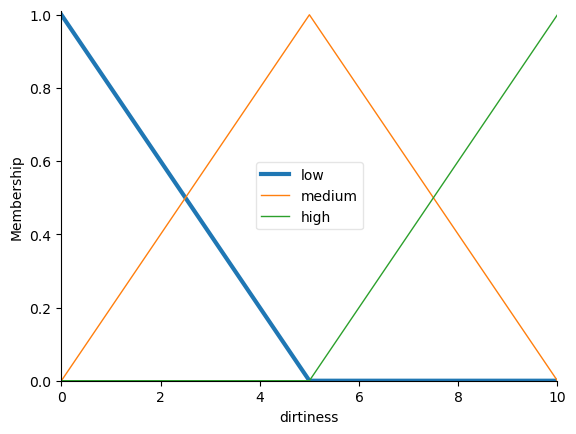

In [2]:
dirtiness['low'].view()

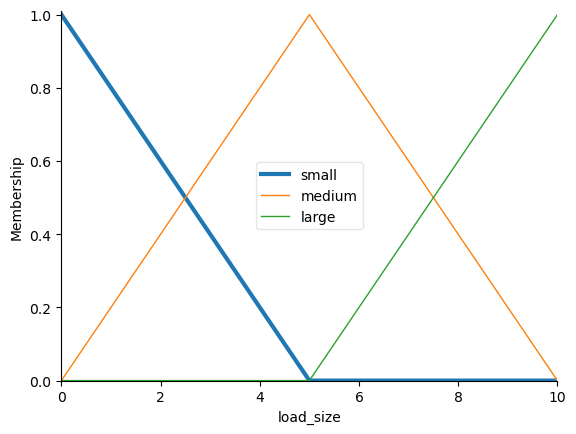

In [5]:
load_size['small'].view()

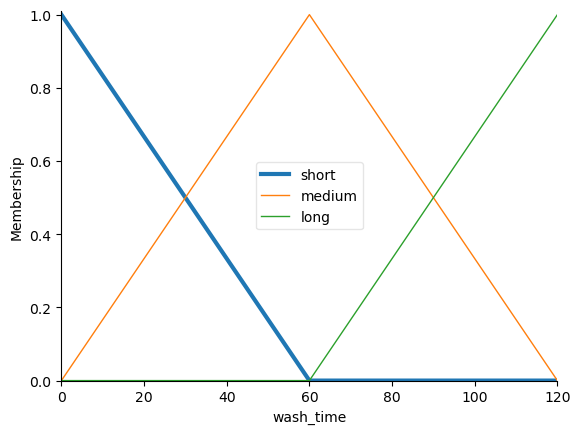

In [6]:
wash_time['short'].view()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

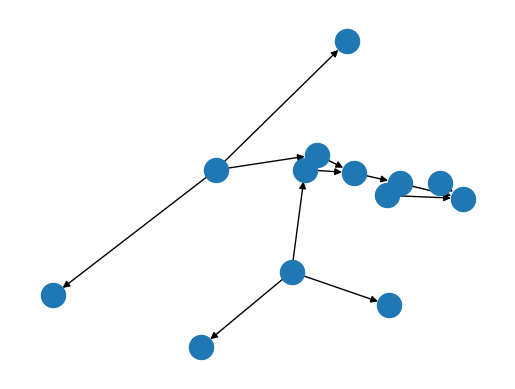

In [7]:
rule1.view()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

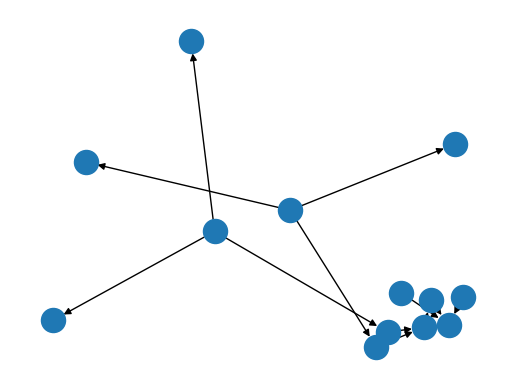

In [9]:
rule2.view()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

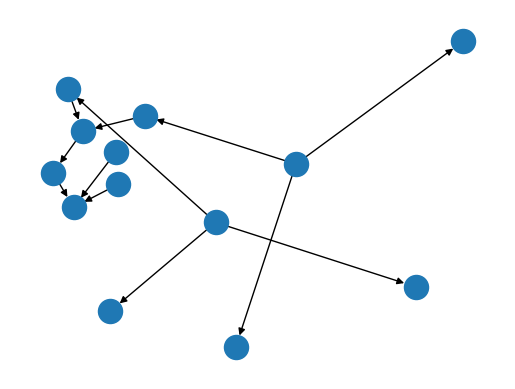

In [10]:
rule3.view()